In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import neccessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load data

In [3]:
# Load data from file
file_path = '/content/drive/MyDrive/Thesis/gender_summary_by_year_journal.csv'
df = pd.read_csv(file_path)
df.head(10)

,year,journal,F,M
0,2013,Annals of Operations Research,82,330
1,2013,Computers and Operations Research,125,505
2,2013,European Journal of Operational Research,205,784
3,2013,International Journal of Operations & Producti...,36,117
4,2013,International Journal of Production Economics,184,633
5,2013,International Transactions in Operational Rese...,24,101
6,2013,Manufacturing & Service Operations Management,21,87
7,2013,Operations Research,33,177
8,2013,Transportation Research Part E: Logistics and ...,49,176
9,2013,Transportation Science,22,84


# Data Analysis and Visualization

## Year over Year Analysis

In [4]:
# Year-over-year overview: total and female proportion
yearly_summary = df.groupby('year')[['F', 'M']].sum()
yearly_summary['total'] = yearly_summary['F'] + yearly_summary['M']
yearly_summary['female_ratio'] = round((yearly_summary['F'] / yearly_summary['total'])*100,2)
print(yearly_summary['female_ratio'])

year
2013    20.69
2014    21.45
2015    21.35
2016    21.93
2017    21.56
2018    22.66
2019    21.62
2020    21.47
2021    21.45
2022    21.94
Name: female_ratio, dtype: float64


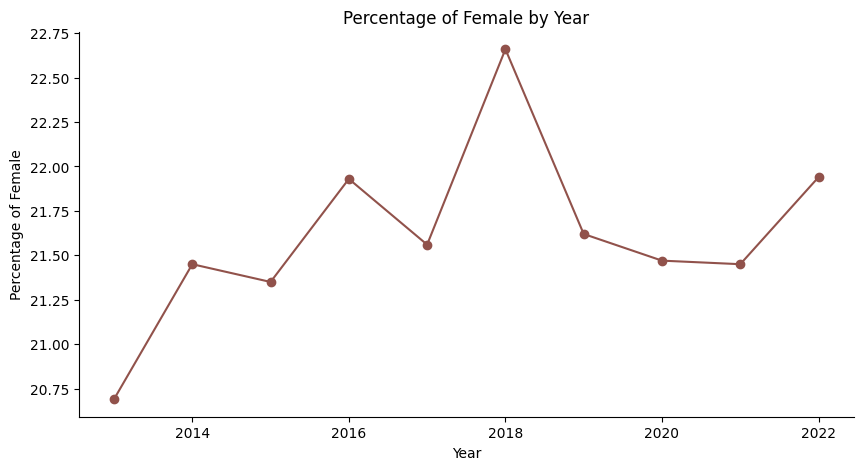

In [16]:
# Plot female proportion
# Set the figure size and fonts
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(yearly_summary.index, yearly_summary['female_ratio'], marker='o', color = "#91524B")
ax.set(title="Percentage of Female by Year", xlabel="Year", ylabel="Percentage of Female")
ax.spines[['top', 'right']].set_visible(False)
plt.show()

## Across Journals

In [11]:
# Percentage of women by journal (average over years)
journal_summary = df.groupby('journal')[['F', 'M']].sum()
journal_summary['total'] = journal_summary['F'] + journal_summary['M']
journal_summary['female_ratio'] = (journal_summary['F'] / journal_summary['total'])*100

# Percentage of men by journal (average over years)
journal_summary['male_ratio'] = (journal_summary['M'] / journal_summary['total'])*100

journal_sorted = journal_summary.sort_values(by='female_ratio', ascending=True)
journal_sorted

,F,M,total,female_ratio,male_ratio
journal,,,,,
Operations Research,416,2181,2597,16.018483,83.981517
Manufacturing & Service Operations Management,297,1326,1623,18.299445,81.700555
Transportation Research Part E: Logistics and Transportation Review,867,3756,4623,18.754056,81.245944
Transportation Science,374,1484,1858,20.129171,79.870829
Computers and Operations Research,1380,5071,6451,21.392032,78.607968
International Journal of Production Economics,1627,5732,7359,22.108982,77.891018
European Journal of Operational Research,2805,9757,12562,22.329247,77.670753
International Transactions in Operational Research,538,1835,2373,22.671724,77.328276
Annals of Operations Research,1829,6066,7895,23.166561,76.833439


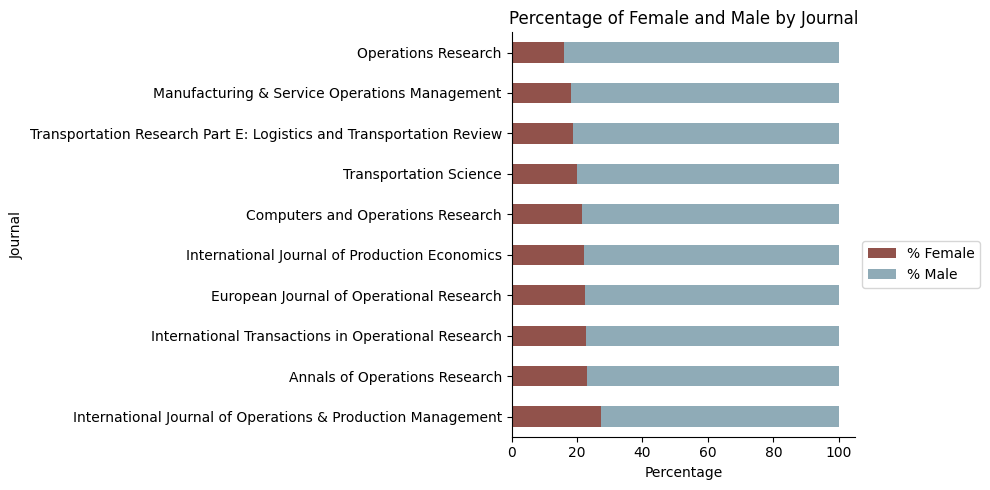

In [14]:
# Set the figure size and fonts
fig, ax = plt.subplots(figsize=(10, 5))

# Plot stacked bar chart
journal_sorted[['female_ratio', 'male_ratio']].plot(kind='barh', stacked=True,
                                                     color=['#91524B', '#8FABB7']
                                                    , ax=ax)

# Set title and labels
ax.set(title="Percentage of Female and Male by Journal",
       xlabel="Percentage",
       ylabel="Journal")

# Improve y-tick labels (journals)
ax.set_yticklabels(journal_sorted.index, fontsize=10)
ax.invert_yaxis()

# Add legend
ax.legend(['% Female', '% Male'], loc='best', bbox_to_anchor=(1.0, 0.5), fontsize=10)

# Remove frame for a cleaner look
ax.spines[['top', 'right']].set_visible(False)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

## Female Representation Across 10 Journals

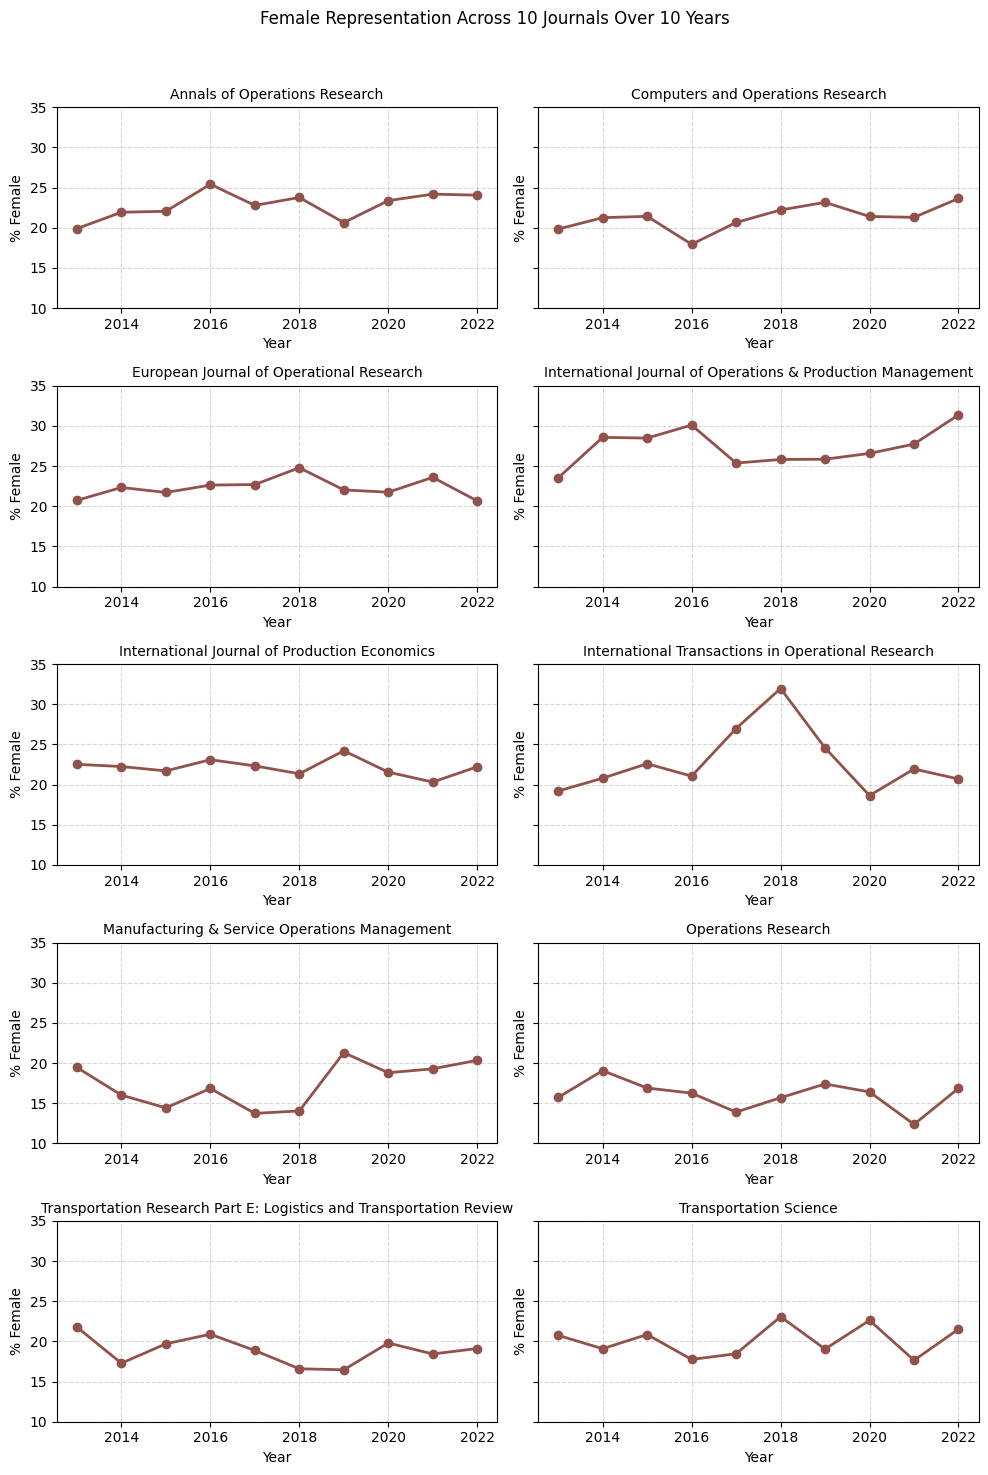

In [25]:
# Calculate % Female
df['female_ratio'] = df['F'] / (df['F'] + df['M']) * 100

# Pivot to get years as rows and journals as columns
df_pivot = df.pivot_table(index='year', columns='journal', values='female_ratio')

#  Plot settings
journals = df_pivot.columns
n = len(journals)

# Create a grid of subplots (adjust rows x cols as needed)
cols = 2
rows = -(-n // cols)  # Ceiling division
fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 3), sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each journal in its subplot
for i, journal in enumerate(journals):
    ax = axes[i]
    ax.plot(df_pivot.index, df_pivot[journal], marker='o', linewidth=2, color = "#91524B")
    ax.set_title(journal, fontsize=10)
    ax.set_xlabel("Year")
    ax.set_ylabel("% Female")
    ax.set_ylim(10, 35)  # Set consistent Y-axis for comparison
    ax.grid(True, linestyle='--', alpha=0.5)

# 5. Hide unused subplots (if less than rows*cols)
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

# Add an overall title
fig.suptitle("Female Representation Across 10 Journals Over 10 Years", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

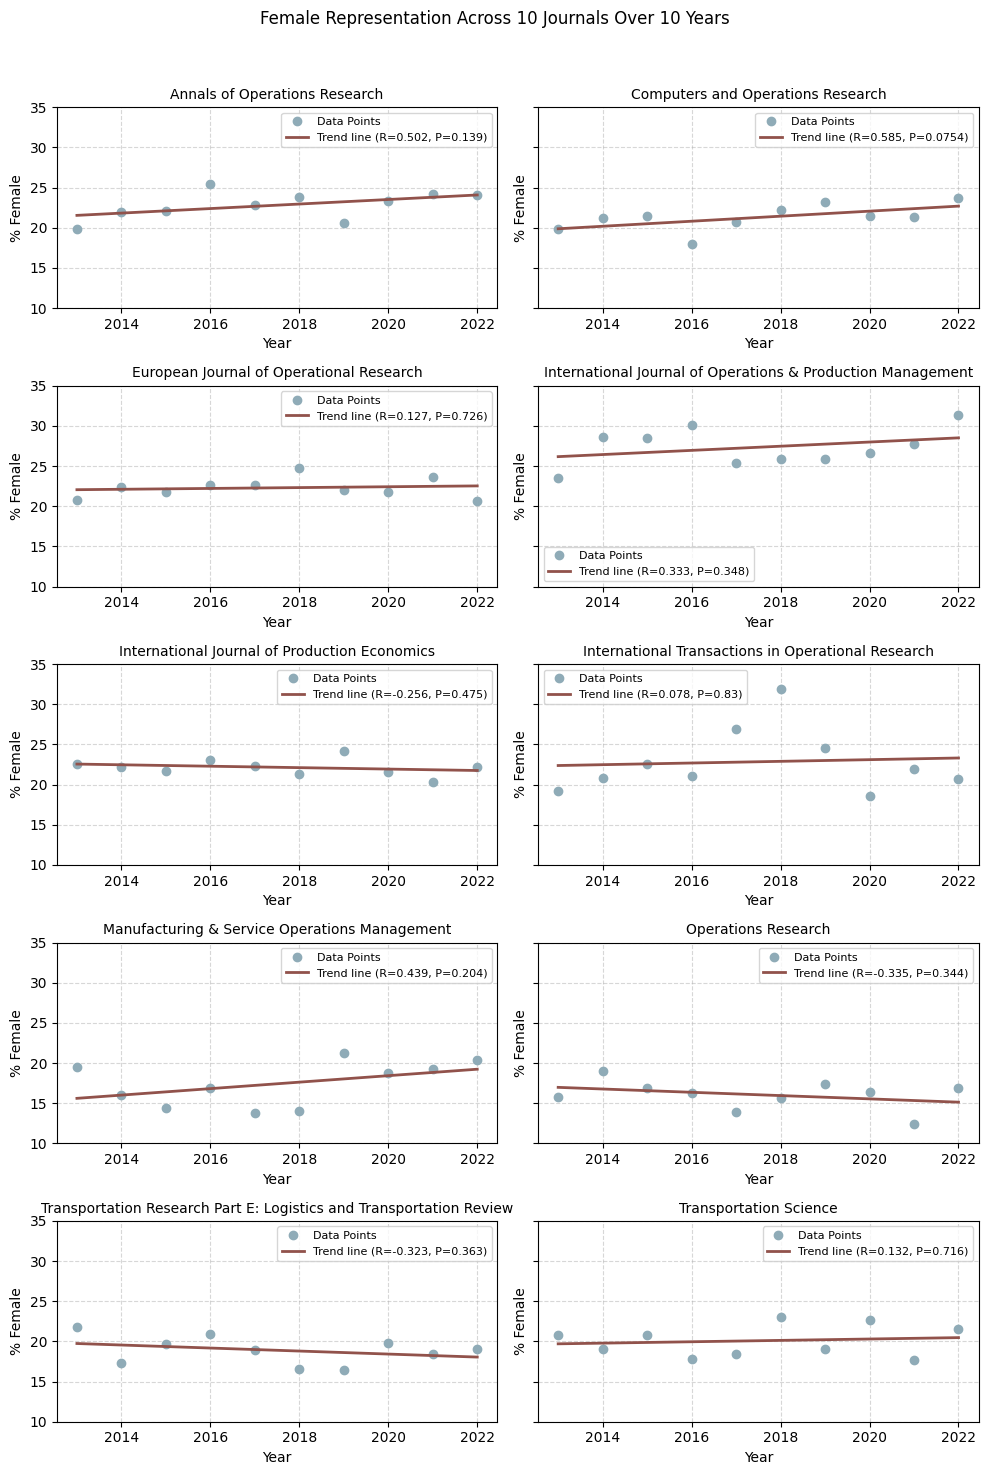

In [30]:
# Setup for plotting
journals = df_pivot.columns[:10]
n = len(journals)
cols = 2
rows = -(-n // cols)

fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 3), sharey=True)
axes = axes.flatten()

# Plot each journal with regression
for i, journal in enumerate(journals):
    ax = axes[i]
    x = df_pivot.index.values
    y = df_pivot[journal].values

    # Scatter plot
    ax.plot(x, y, marker='o', linestyle='', label='Data Points', color= '#8FABB7')

    # Linear regression
    slope, intercept, r_value, p_value, _ = linregress(x, y)
    y_pred = intercept + slope * x

    # Regression line
    ax.plot(x, y_pred, color='#91524B', linewidth=2,
            label=f"Trend line (R={r_value:.3f}, P={p_value:.3g})")

    # Customize axes
    ax.set_title(journal, fontsize=10)
    ax.set_xlabel("Year")
    ax.set_ylabel("% Female")
    ax.set_ylim(10, 35)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=8)

# Clean up unused axes
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

# Add overall title and format layout
fig.suptitle("Female Representation Across 10 Journals Over 10 Years", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Conclusion:
1. The percentage of female authors fluctuated between 2013 and 2022, with a noticeable peak in 2018 followed by a sharp decline in 2019. This drop may be associated with the onset of the COVID-19 pandemic, which has been linked to reduced research output among women in academia.
2. Among the 10 journals analyzed, the percentage of female authors generally ranges between 16% and 27%, with the International Journal of Operations & Production Management showing the highest representation of women. Although all journals remain male-dominated, the variation in female participation suggests differing levels of gender balance across publication venues.
3. While several journals show upward or downward trends in female representation over the past decade, none of these trends are statistically significant (P > 0.05). This suggests that the observed changes could be due to random fluctuations rather than meaningful shifts in gender representation. As a result, we cannot confidently conclude that female participation has increased or decreased in any of the journals based on this data alone.